In [61]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.graphics.api as smg
from scipy import stats
from matplotlib.patheffects import withStroke
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import warnings

warnings.filterwarnings('ignore')
#warnings.filterwarnings('default')
%matplotlib inline

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 1. nan]


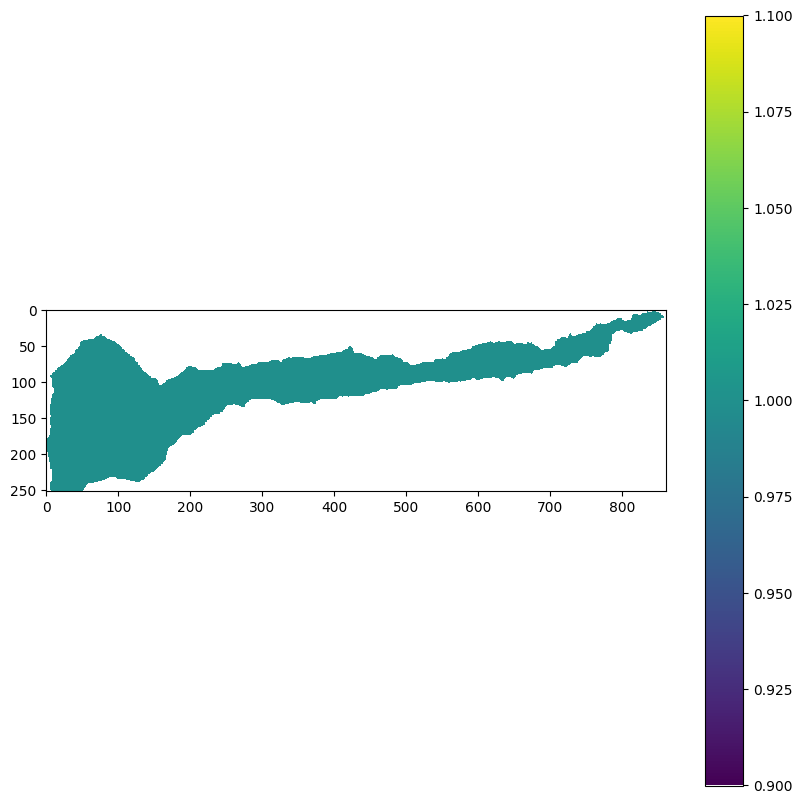

In [5]:
cuencaRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/Cuencacorte2.tif?raw=true')
cuencaB1 = cuencaRaster.read(1)

# Correción para organizar luego los otros valores
cuencaB1 = np.where(cuencaB1 == 255, np.nan, 1)

plt.figure(figsize=(10, 10))  # Ajusta el tamaño
plt.imshow(cuencaB1)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', cuencaB1.shape)
print('Valores únicos: ', np.unique(cuencaB1))

InventarioB1
Forma:  (252, 862)
Valores únicos:  [0 1]


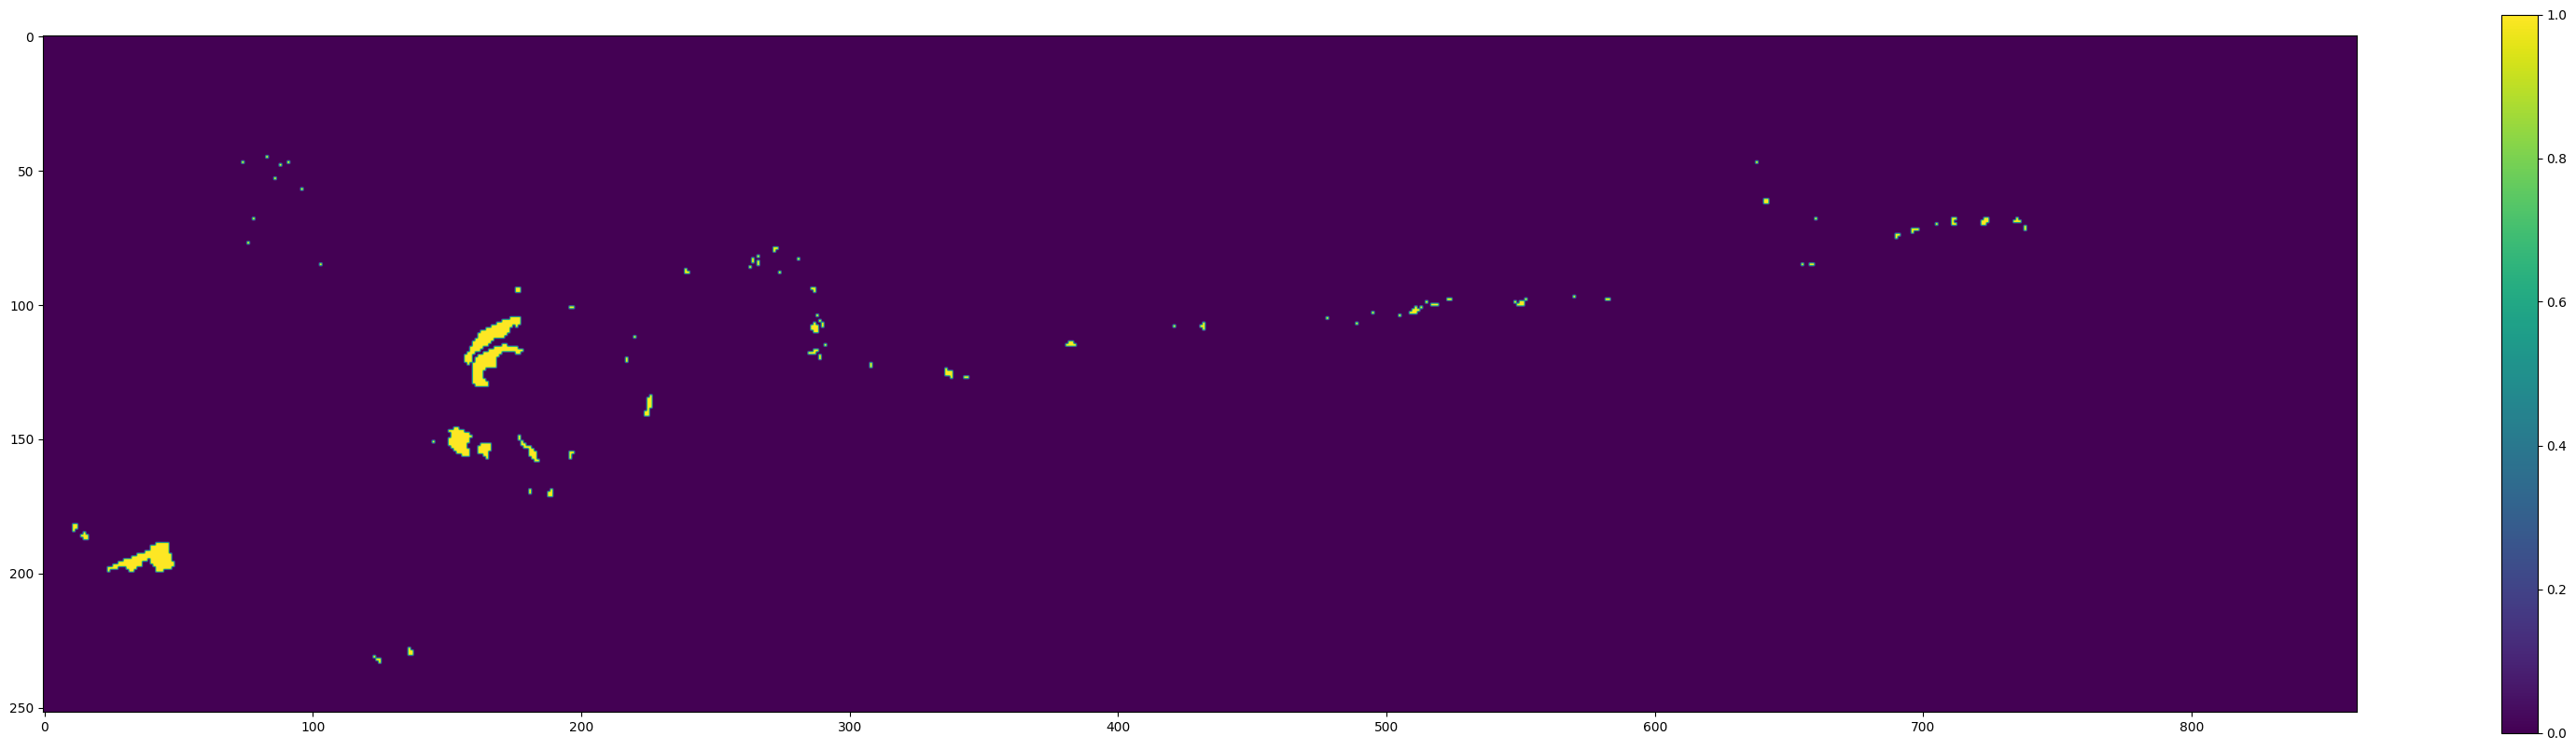

In [6]:
inventarioRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/InvetarioRas2.tif?raw=true')
inventarioB1 = inventarioRaster.read(1)

# Correción para organizar luego los otros valores
inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)
#inventarioB1 = np.where(inventarioB1 == 0, np.nan,  inventarioB1)
#inventarioB1 = np.where(inventarioB1 == 15, np.nan,  inventarioB1)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioB1)
plt.colorbar();

print('InventarioB1')
print('Forma: ', inventarioB1.shape)
print('Valores únicos: ', np.unique(inventarioB1))

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 0.  1. nan]


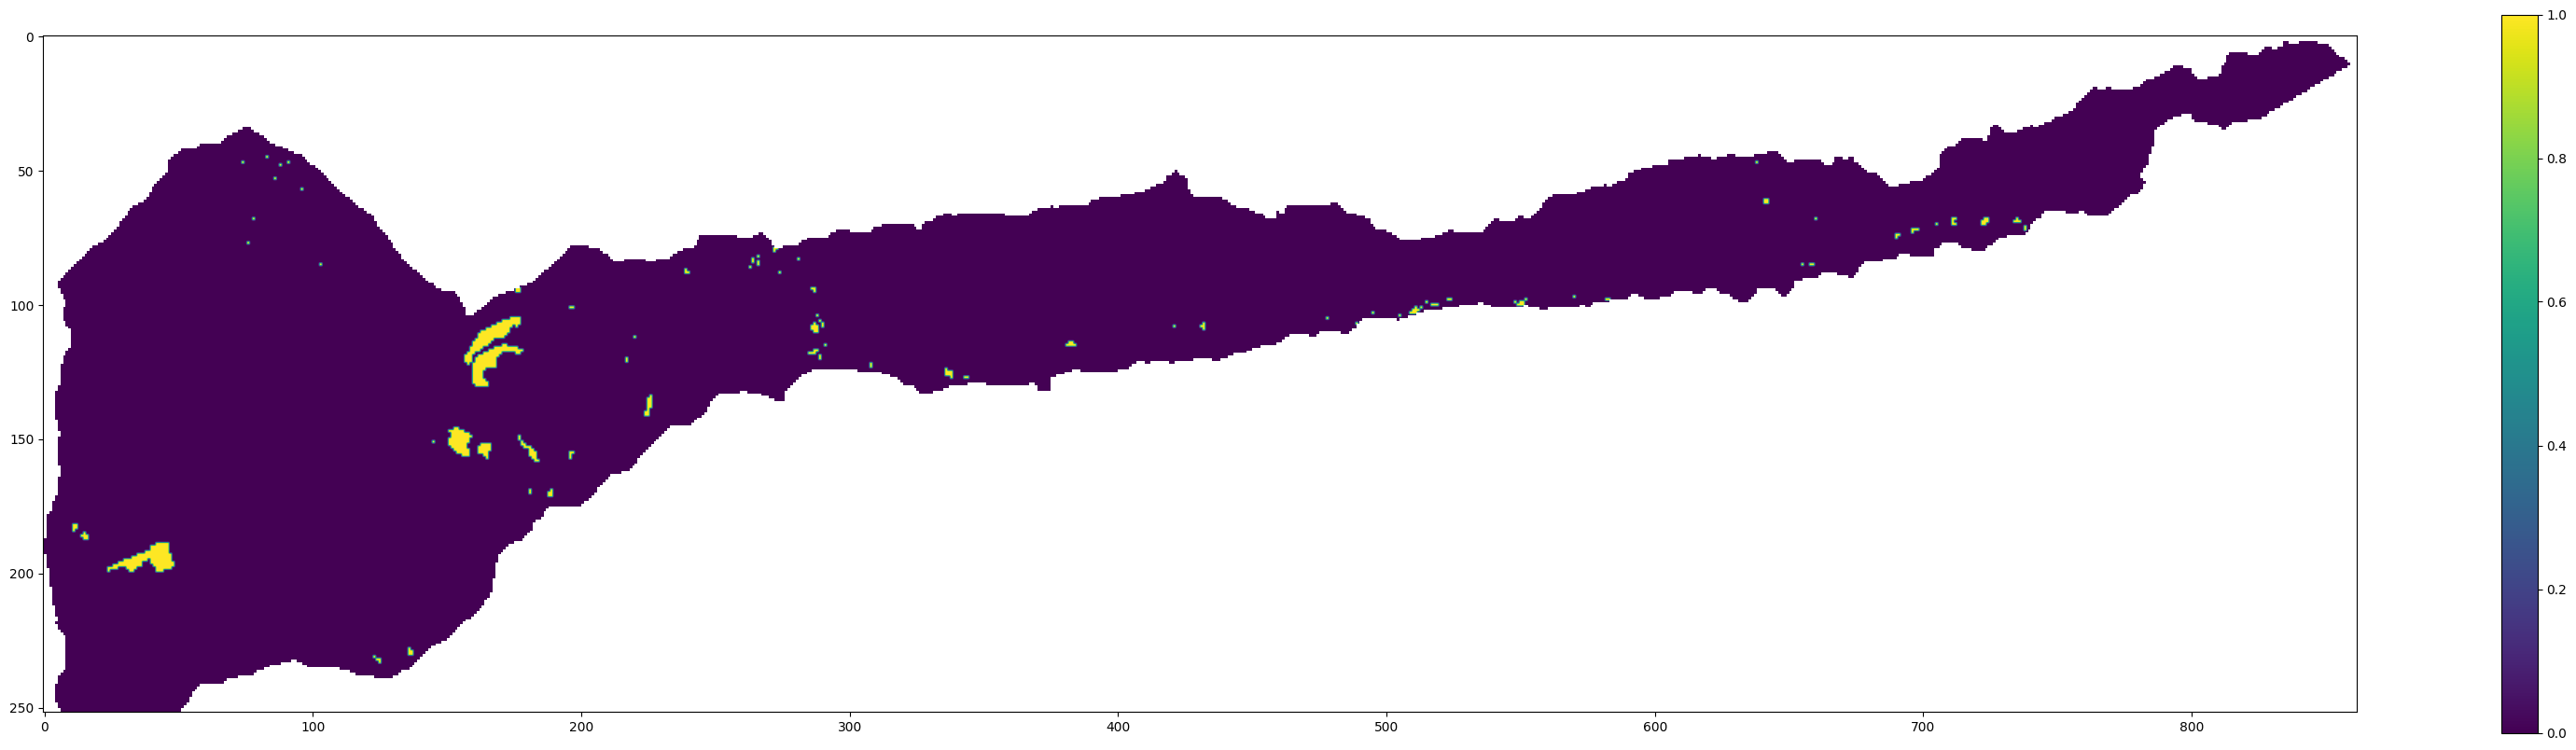

In [7]:
inventarioZona = inventarioB1 * cuencaB1

#inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioZona)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', inventarioZona.shape)
print('Valores únicos: ', np.unique(inventarioZona))

#plt.savefig('InventarioLectura.png', dpi=500, bbox_inches='tight')

Forma:  (252, 862)
Valores únicos:  [-1.000000e+00  0.000000e+00  9.690028e-03 ...  3.599896e+02  3.599927e+02
           nan]


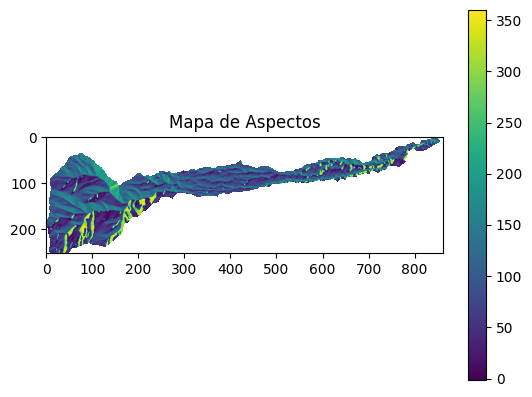

In [8]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AspectoRas2.tif?raw=true')
aspectos=raster.read(1)
aspectos=np.where(aspectos == aspectos.min(), np.nan, aspectos)
plt.imshow(aspectos)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Aspectos')
print('Forma: ', aspectos.shape)
print('Valores únicos: ', np.unique(aspectos))

Forma:  (252, 862)
Valores únicos:  [-59.04177  -51.092407 -49.6877   ...  23.87655   26.930264        nan]


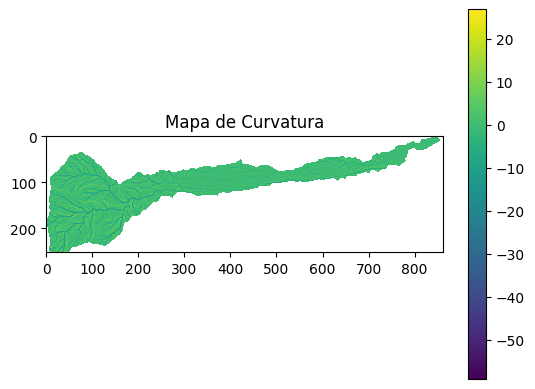

In [9]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/CurvaturaRas2.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura == curvatura.min(), np.nan, curvatura)
plt.imshow(curvatura)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Curvatura')
print('Forma: ', curvatura.shape)
print('Valores únicos: ', np.unique(curvatura))

Forma:  (252, 862)
Valores únicos:  [1582.284  1582.3328 1582.3752 ... 2934.0857 2934.192        nan]


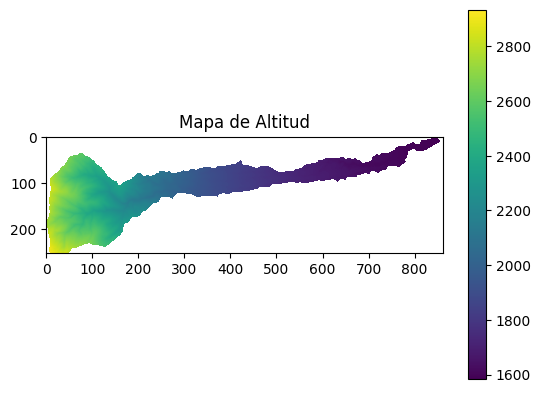

In [10]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AltitudRas2.tif?raw=true')
altitud=raster.read(1)
altitud=np.where(altitud == altitud.min(), np.nan, altitud)
plt.imshow(altitud)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Altitud')
print('Forma: ', altitud.shape)
print('Valores únicos: ', np.unique(altitud))

Forma:  (252, 862)
Valores únicos:  [ 1.  2.  3.  4.  5. nan]


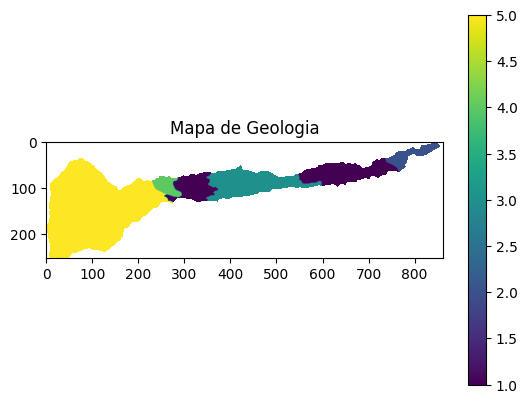

In [11]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/GeoRas2.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia == 255,np.nan,geologia)
geologia=np.where(geologia == geologia.min(), np.nan, geologia)
plt.imshow(geologia)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Geologia')
print('Forma: ', geologia.shape)
print('Valores únicos: ', np.unique(geologia))

Forma:  (252, 862)
Valores únicos:  [ 0.  1.  2.  3.  4. nan]


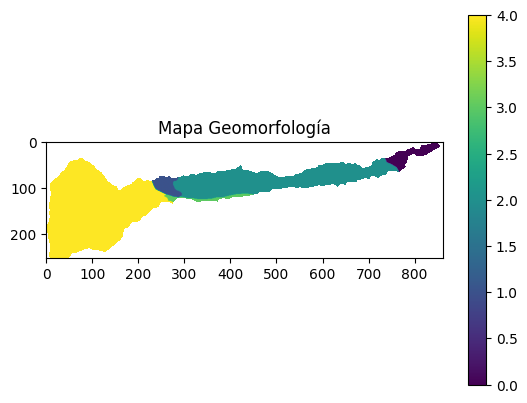

In [12]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/MorfoRas2.tif?raw=true')
geomorfo=raster.read(1)
geomorfo=np.where(geomorfo == 255,np.nan,geomorfo)
plt.imshow(geomorfo)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa Geomorfología')
print('Forma: ', geomorfo.shape)
print('Valores únicos: ', np.unique(geomorfo))

Forma:  (252, 862)
Valores únicos:  [0.0000000e+00 1.9843397e-03 3.8160379e-03 ... 6.2051132e+01 6.2054195e+01
           nan]


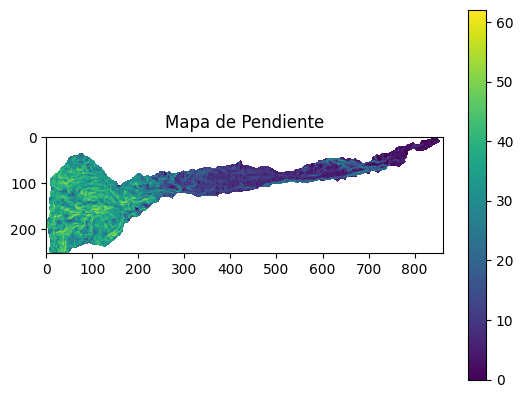

In [13]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/PendienteRas3.tif?raw=true')
slope=raster.read(1)
slope=np.where(slope == slope.min(), np.nan, slope)
plt.imshow(slope)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Pendiente')
print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))

In [14]:
#Convertimos matrices a vectores
inventariovector = inventarioZona.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

aspectosvector = aspectos.ravel()
print('Longitud aspectosvector: ', aspectosvector.shape[0])

curvaturavector = curvatura.ravel()
print('Longitud curvaturavector: ', curvaturavector.shape[0])

altitudvector = altitud.ravel()
print('Longitud altitudvector: ', altitudvector.shape[0])

geologiavector = geologia.ravel()
print('Longitud geologiavector: ', geologiavector.shape[0])

geomorfovector = geomorfo.ravel()
print('Longitud geomorfovector: ', geomorfovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

#eliminamos los nans del vector
inventariovectorMenM = inventariovector[~np.isnan(inventariovector)]
print('Longitud inventariovectorMenM: ', inventariovectorMenM.shape[0])

aspectosvectorMenM = aspectosvector[~np.isnan(aspectosvector)]
print('Longitud aspectosvectorMenM: ', aspectosvectorMenM.shape[0])

curvaturavectorMenM = curvaturavector[~np.isnan(curvaturavector)]
print('Longitud curvaturavectorMenM: ', curvaturavectorMenM.shape[0])

altitudvectorMenM = altitudvector[~np.isnan(altitudvector)]
print('Longitud altitudvectorMenM: ', altitudvectorMenM.shape[0])

geologiavectorMenM = geologiavector[~np.isnan(geologiavector)]
print('Longitud geologiavectorMenM: ', geologiavectorMenM.shape[0])

geomorfovectorMenM = geomorfovector[~np.isnan(geomorfovector)]
print('Longitud geomorfovectorMenM: ', geomorfovectorMenM.shape[0])

slopevectorMenM = slopevector[~np.isnan(slopevector)]
print('Longitud slopevectorMenM: ', slopevectorMenM.shape[0])

#Realizamos el Dataframe

diccionario={'inventario':inventariovectorMenM, 'aspectos':aspectosvectorMenM, 'curvatura':curvaturavectorMenM,
               'altitud':altitudvectorMenM,'geologia':geologiavectorMenM,
               'geomorfologia':geomorfovectorMenM, 'pendiente':slopevectorMenM}

tablaDatos=pd.DataFrame(diccionario)
print(list(tablaDatos.columns))

tablaDatos.tail(5)

Longitud inventariovector:  217224
Longitud aspectosvector:  217224
Longitud curvaturavector:  217224
Longitud altitudvector:  217224
Longitud geologiavector:  217224
Longitud geomorfovector:  217224
Longitud slopevector:  217224
Longitud inventariovectorMenM:  63282
Longitud aspectosvectorMenM:  63282
Longitud curvaturavectorMenM:  63282
Longitud altitudvectorMenM:  63282
Longitud geologiavectorMenM:  63282
Longitud geomorfovectorMenM:  63282
Longitud slopevectorMenM:  63282
['inventario', 'aspectos', 'curvatura', 'altitud', 'geologia', 'geomorfologia', 'pendiente']


,inventario,aspectos,curvatura,altitud,geologia,geomorfologia,pendiente
63277,0.0,67.359482,-2.209582,2822.357666,5.0,4.0,33.464508
63278,0.0,31.936472,13.475179,2820.012939,5.0,4.0,28.379774
63279,0.0,33.755505,11.376484,2816.632080,5.0,4.0,27.254066
63280,0.0,37.180698,6.638794,2812.989258,5.0,4.0,21.701637
63281,0.0,28.403448,1.510018,2810.272217,5.0,4.0,15.197203


In [15]:
resumen = tablaDatos.describe().T
print(resumen)

                 count          mean         std          min          25%  \
inventario     63282.0  1.019247e-02    0.100443     0.000000     0.000000   
aspectos       63282.0  1.108404e+02   84.190811    -1.000000    52.710374   
curvatura      63282.0  2.893484e-09    4.624277   -59.041771    -1.008415   
altitud        63282.0  2.166668e+03  382.658539  1582.284058  1812.693939   
geologia       63282.0  3.696343e+00    1.621941     1.000000     3.000000   
geomorfologia  63282.0  3.013622e+00    1.204152     0.000000     2.000000   
pendiente      63282.0  2.399402e+01   14.347461     0.000000    10.019297   

                       50%          75%          max  
inventario        0.000000     0.000000     1.000000  
aspectos         93.580257   141.737938   359.992706  
curvatura         0.341596     1.956921    26.930264  
altitud        2189.159668  2508.885803  2934.191895  
geologia          5.000000     5.000000     5.000000  
geomorfologia     4.000000     4.000000     4

In [16]:
varCategoricas = ['inventario', 'geologia', 'geomorfologia']
varCategoricas1 = ['geologia', 'geomorfologia']
varContinuas = ['pendiente', 'curvatura', 'aspecto', 'altitud']

tablaDatosContinuos = tablaDatos.drop(varCategoricas, axis=1)
tablaDatosContinuos.tail(5)

,aspectos,curvatura,altitud,pendiente
63277,67.359482,-2.209582,2822.357666,33.464508
63278,31.936472,13.475179,2820.012939,28.379774
63279,33.755505,11.376484,2816.632080,27.254066
63280,37.180698,6.638794,2812.989258,21.701637
63281,28.403448,1.510018,2810.272217,15.197203


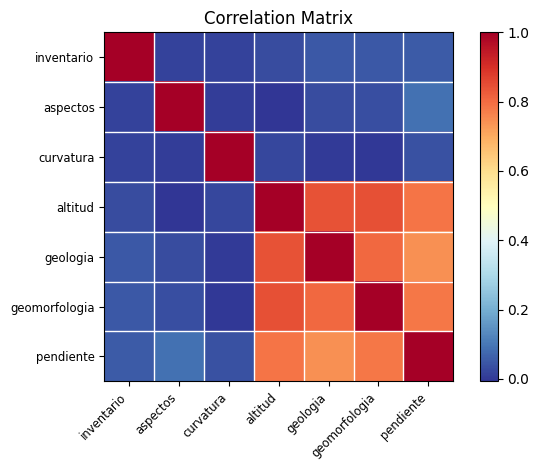

In [17]:
MatrizCorrelacion = pd.DataFrame(tablaDatos.corr())
smg.plot_corr(MatrizCorrelacion, xnames=list(MatrizCorrelacion.columns));
plt.savefig('MatrizDeCorrelación.png', dpi=500, bbox_inches='tight')

In [19]:
## Media de variable independiente de acuerdo al inventario
media=tablaDatos.groupby('inventario').mean()
print(media)

              aspectos  curvatura      altitud  geologia  geomorfologia  \
inventario                                                                
0.0         110.730560  -0.006166  2165.468994  3.688156       3.007727   
1.0         121.508682   0.598799  2283.169678  4.491473       3.586047   

            pendiente  
inventario             
0.0         23.917473  
1.0         31.427441  


In [20]:
## Valores de Movimientos en masa
contarInv = tablaDatos['inventario'].value_counts()
print(contarInv, '\n')

movEnMasa = tablaDatos.inventario.astype(bool)
noMovEnMasa = tablaDatos[movEnMasa]
siMovEnMasa = tablaDatos[~movEnMasa]

print('Si hay Movimiento en Masa')
print(siMovEnMasa.count(), '\n')

print('No hay Movimiento en Masa')
print(noMovEnMasa.count(), '\n')

inventario
0.0    62637
1.0      645
Name: count, dtype: int64 

Si hay Movimiento en Masa
inventario       62637
aspectos         62637
curvatura        62637
altitud          62637
geologia         62637
geomorfologia    62637
pendiente        62637
dtype: int64 

No hay Movimiento en Masa
inventario       645
aspectos         645
curvatura        645
altitud          645
geologia         645
geomorfologia    645
pendiente        645
dtype: int64 



In [21]:
tablaDatosVariables = list(tablaDatos.columns)
tablaDatosVariables.remove('inventario')

for variable in tablaDatosVariables:
    estadistico = stats.ttest_ind(noMovEnMasa[f'{variable}'], siMovEnMasa[f'{variable}'])

    print(f'{variable}:\nValorP:', estadistico[1],'\n')   

aspectos:
ValorP: 0.0012173308557613834 

curvatura:
ValorP: 0.0009476058887244239 

altitud:
ValorP: 7.629559539022105e-15 

geologia:
ValorP: 5.664574796573222e-36 

geomorfologia:
ValorP: 6.327400990018606e-34 

pendiente:
ValorP: 5.53292632572145e-40 



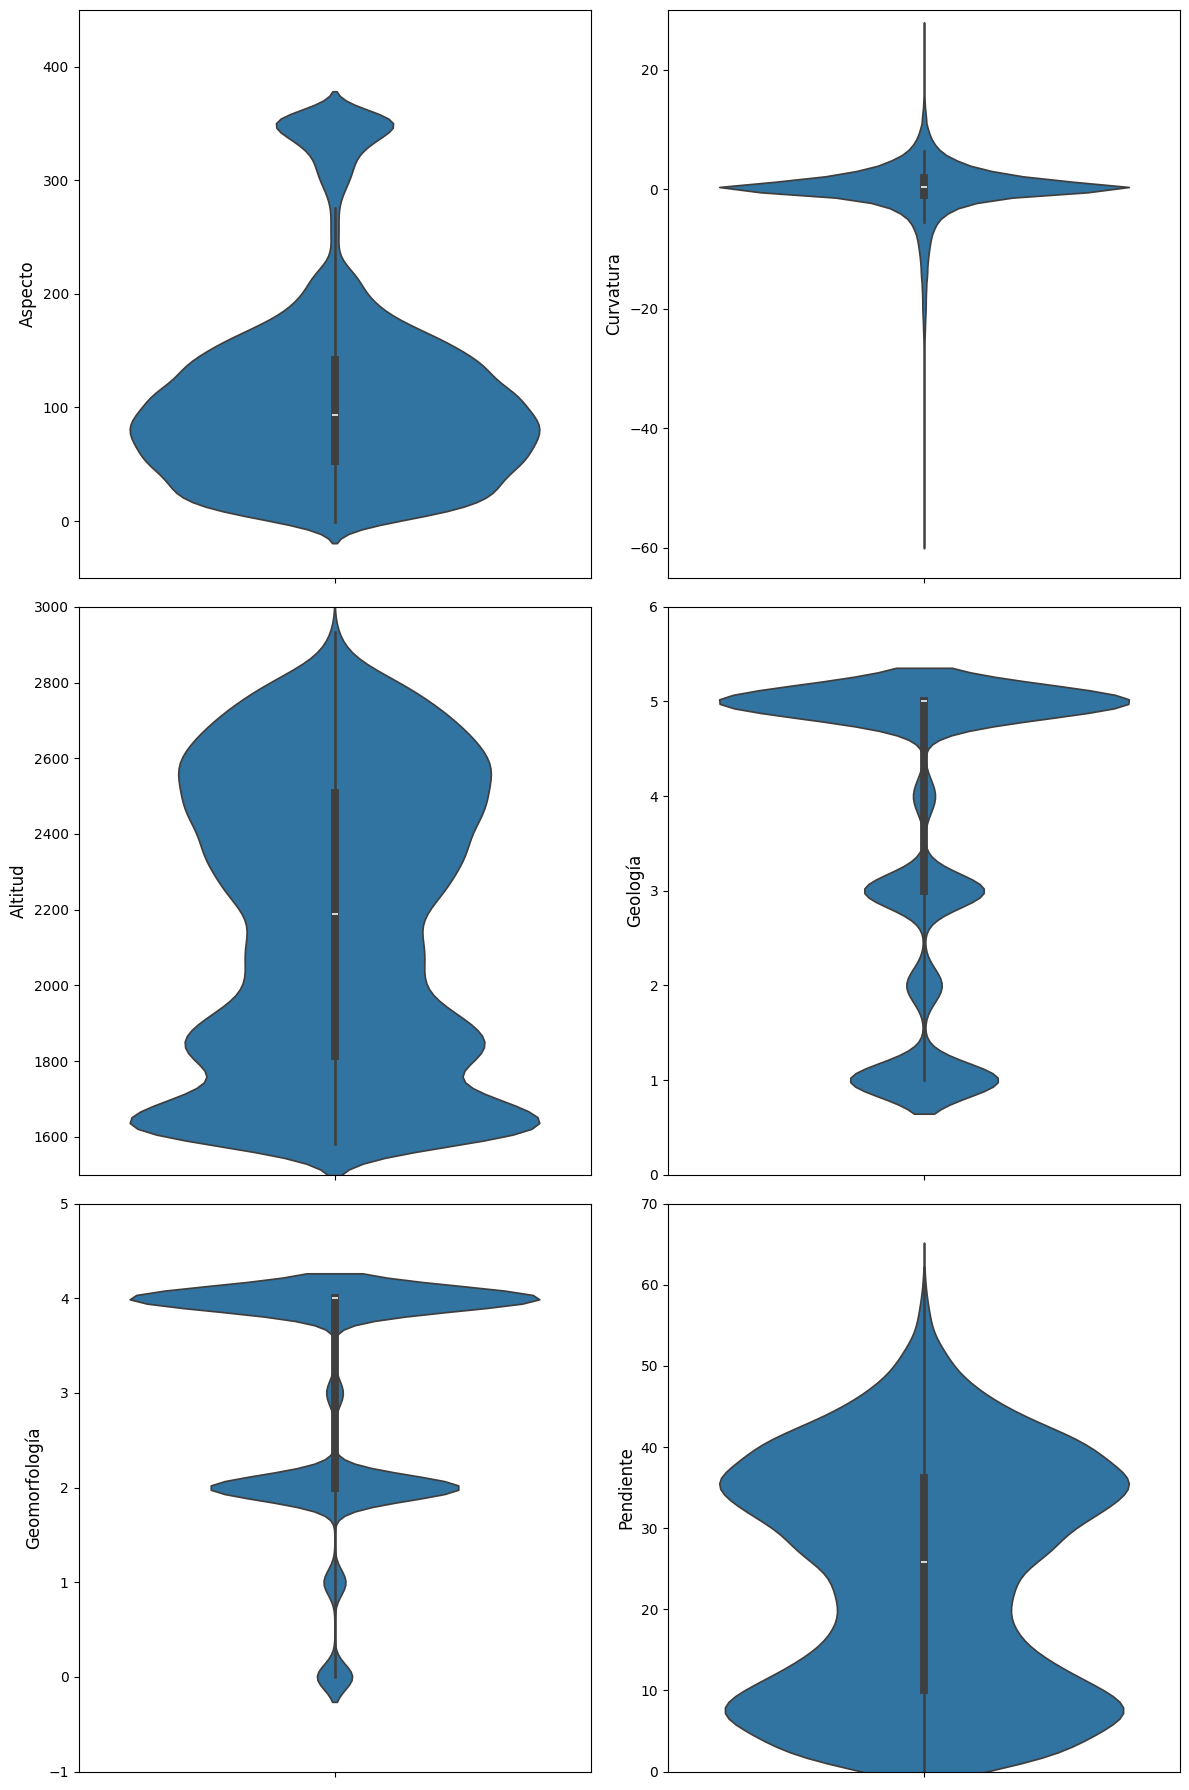

In [44]:
tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
nombres = ['Aspecto','Curvatura','Altitud','Geología','Geomorfología','Pendiente']
limites = [{-50:450}, {-65:30}, {1500:3000}, {0:6}, {-1:5}, {0:70}]

for i, variable in enumerate(tablaDatosVariables):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    sns.violinplot(tablaDatosSinInv[variable], ax=ax)
    
    limitesDic = limites[i]
    clave = list(limitesDic.keys())[0]
    valor = list(limitesDic.values())[0]
    
    ax.set_ylim(clave,valor)
    ax.set_ylabel(nombres[i], color='k', size=12)


plt.subplots_adjust(top=1, hspace=0.4, wspace=0.2)
plt.tight_layout()
#plt.savefig('GraficosViolín.png', dpi=500, bbox_inches='tight')
plt.show()

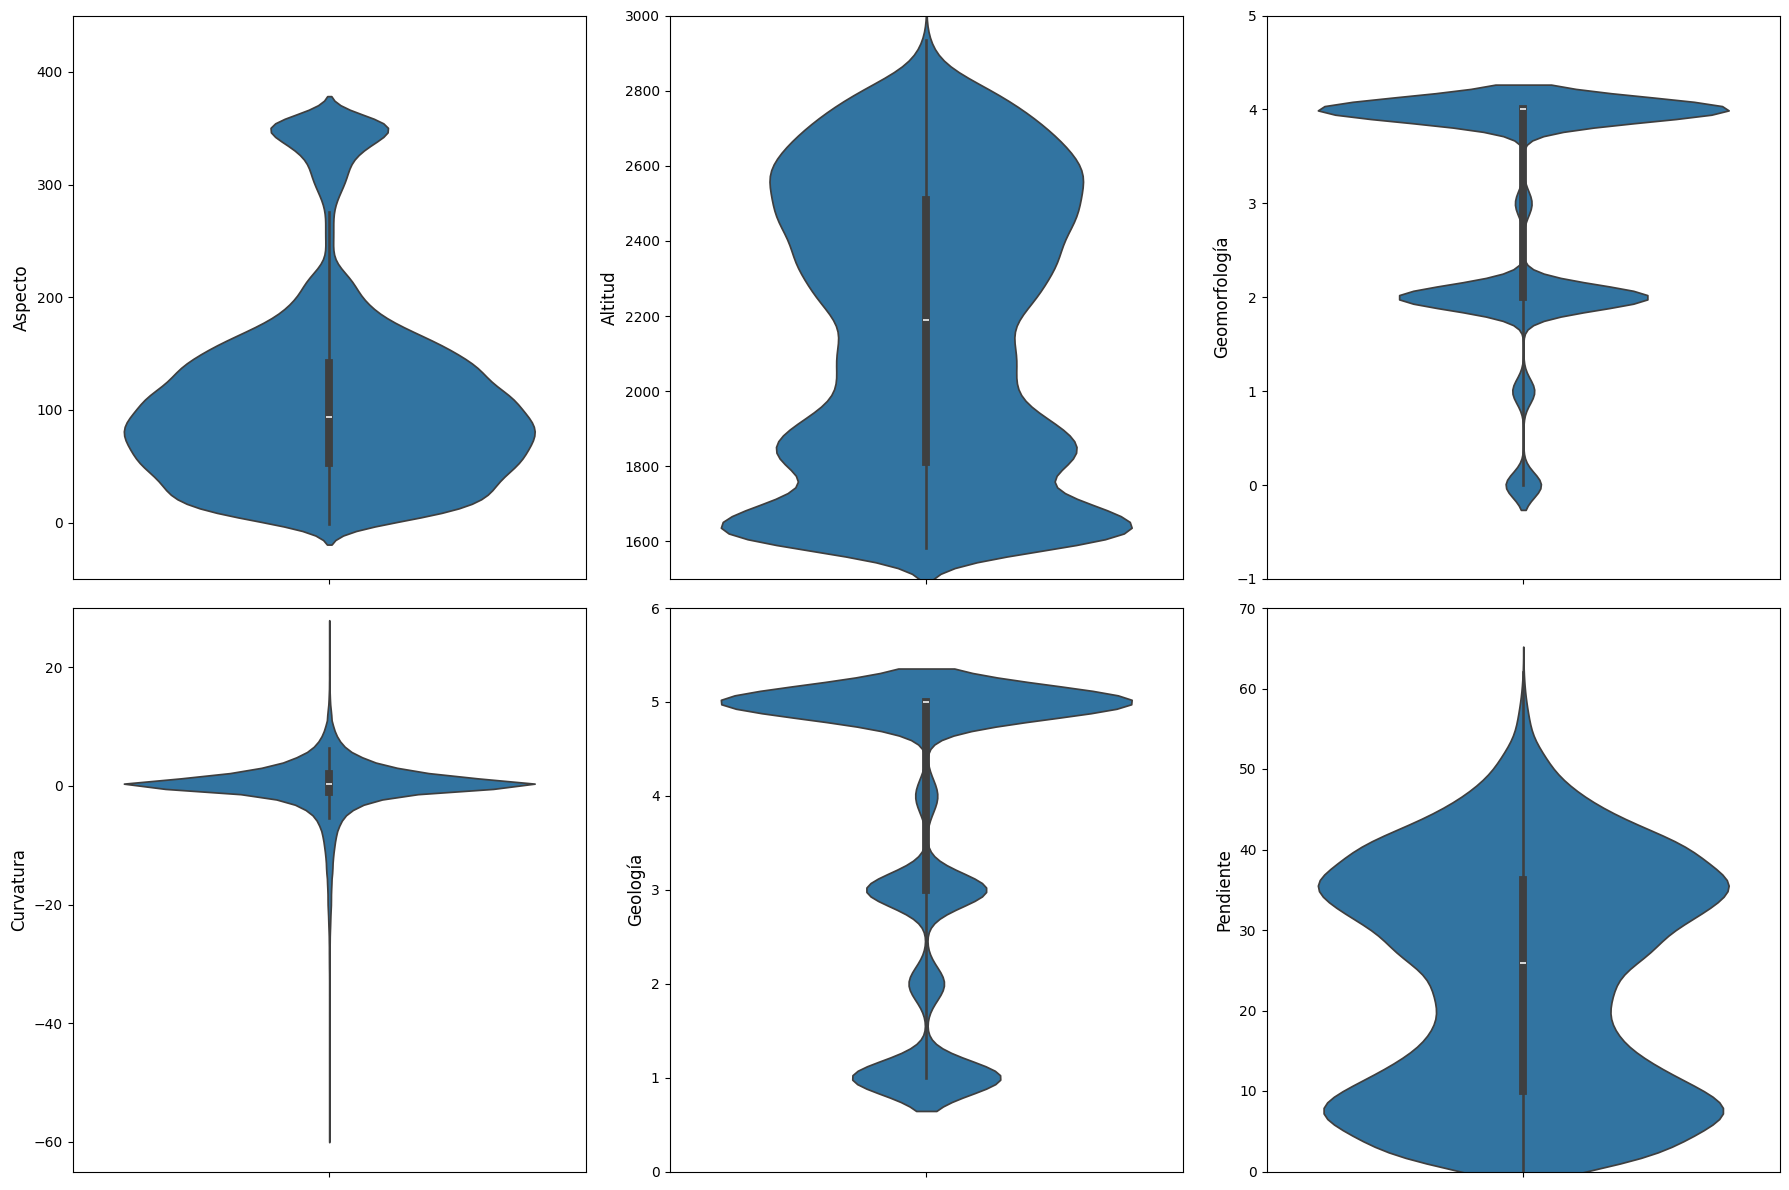

In [43]:
tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
nombres = ['Aspecto','Curvatura','Altitud','Geología','Geomorfología','Pendiente']
limites = [{-50:450}, {-65:30}, {1500:3000}, {0:6}, {-1:5}, {0:70}]

for i, variable in enumerate(tablaDatosVariables):
    row, col = i % 2, i // 2
    ax = axes[row, col]

    sns.violinplot(tablaDatosSinInv[variable], ax=ax)
    
    limitesDic = limites[i]
    clave = list(limitesDic.keys())[0]
    valor = list(limitesDic.values())[0]
    
    ax.set_ylim(clave,valor)
    ax.set_ylabel(nombres[i], color='k', size=12)


plt.subplots_adjust(top=1, hspace=0.2, wspace=0.4)
plt.tight_layout()
#plt.savefig('GraficosViolín.png', dpi=500, bbox_inches='tight')
plt.show()

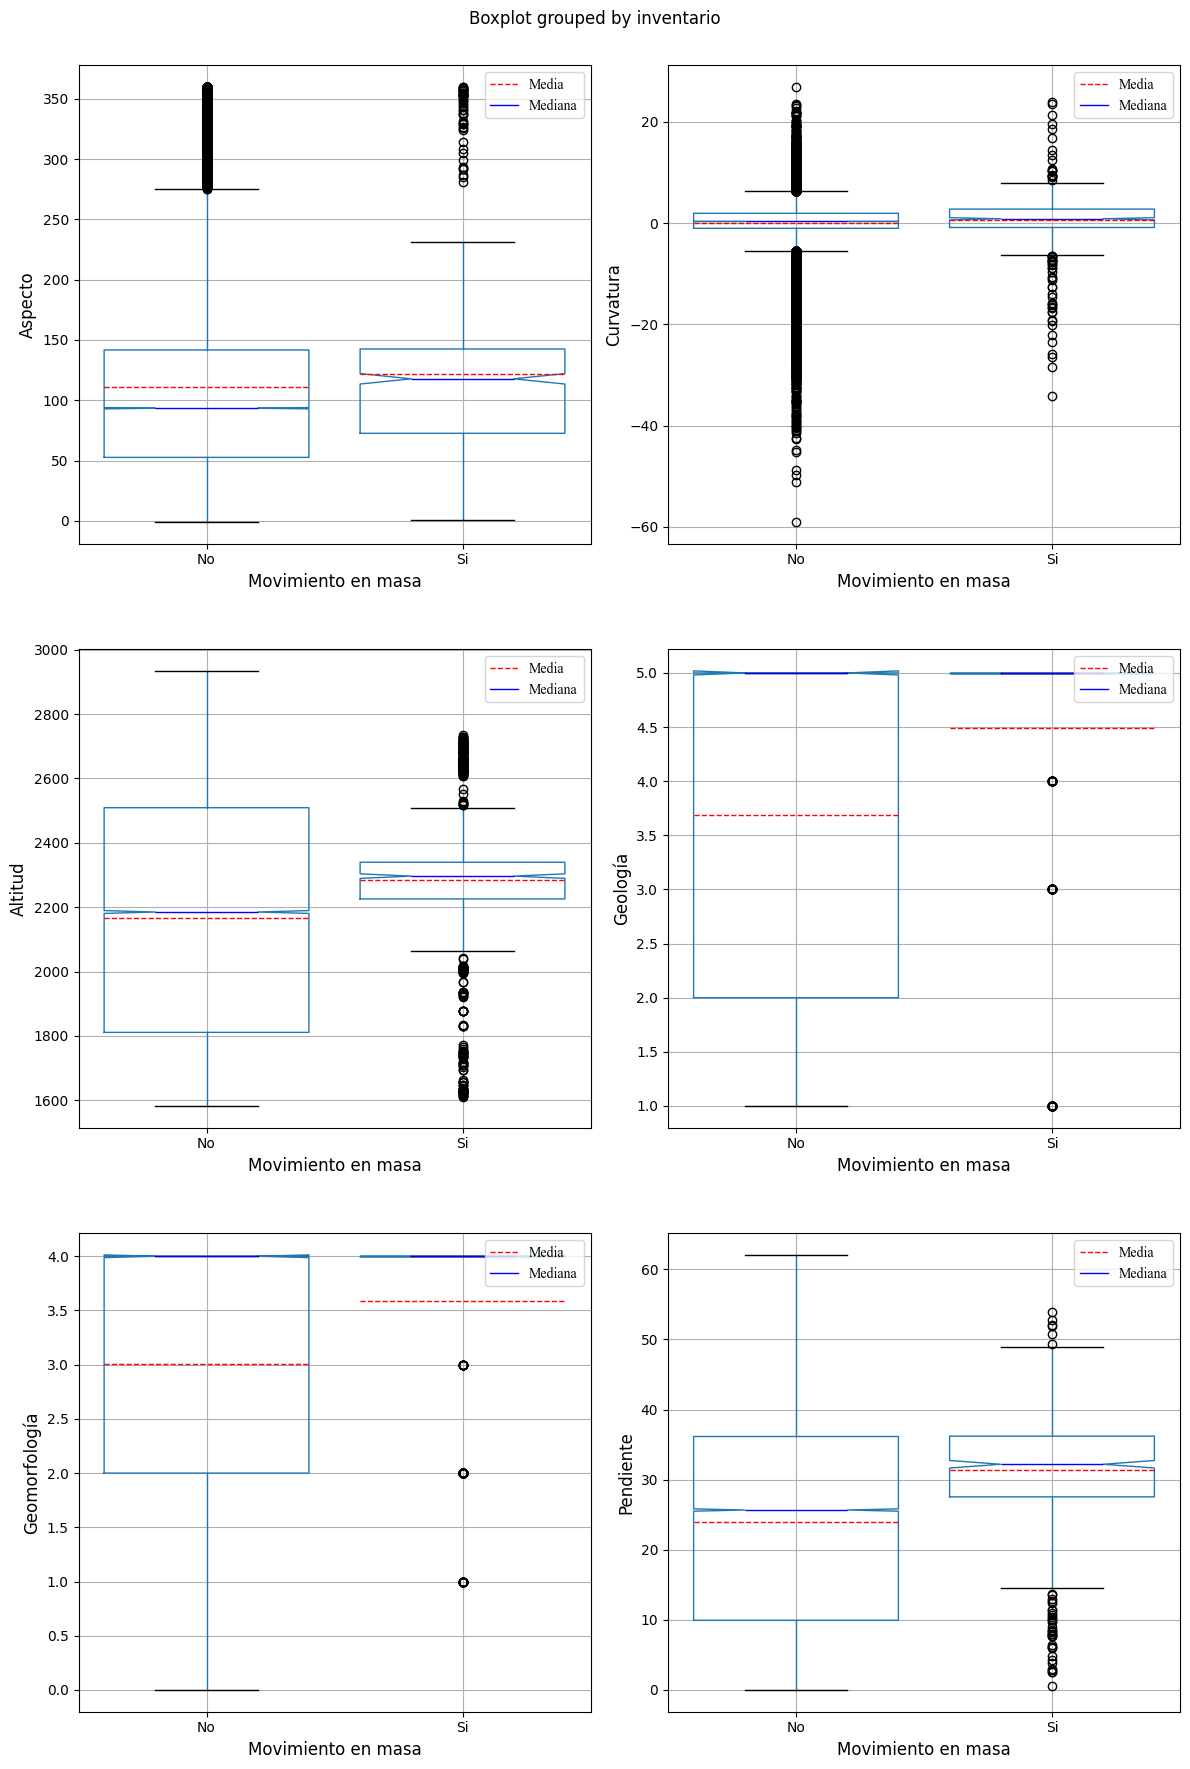

In [46]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 18))
nombres = ['Aspecto','Curvatura','Altitud','Geología','Geomorfología','Pendiente']

for i,variable in enumerate(tablaDatosVariables):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    tablaDatos.boxplot(variable, by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True,
                         medianprops={'color': 'blue'}, meanprops={'color': 'red'}, ax = ax)

    # Calcula la mediana y la media para cada categoría de 'inventario'
    medians = tablaDatos.groupby('inventario')[variable].median()
    means = tablaDatos.groupby('inventario')[variable].mean()
    q1 = tablaDatos.groupby('inventario')[variable].quantile(0.25)
    q3 = tablaDatos.groupby('inventario')[variable].quantile(0.75)
    
    ax.set_ylabel(nombres[i], color='k', size=12)
    ax.set_xlabel('Movimiento en masa', color='k', size=12)
    
    ax.plot([], [], '--', linewidth=1, color='red', label='Media')
    ax.plot([], [], '-', linewidth=1, color='blue', label='Mediana')
        
    legend = ax.legend(loc='upper right')
    for text in legend.get_texts():
        text.set_fontname("Times New Roman")
        text.set_fontsize(10)

    ax.set_title('\n')
    ax.set_xticklabels(['No', 'Si'])


plt.subplots_adjust(top=1, hspace=0, wspace=0.2)
plt.tight_layout()
#plt.savefig('BoxPlot.png', dpi=500, bbox_inches='tight')
plt.show()

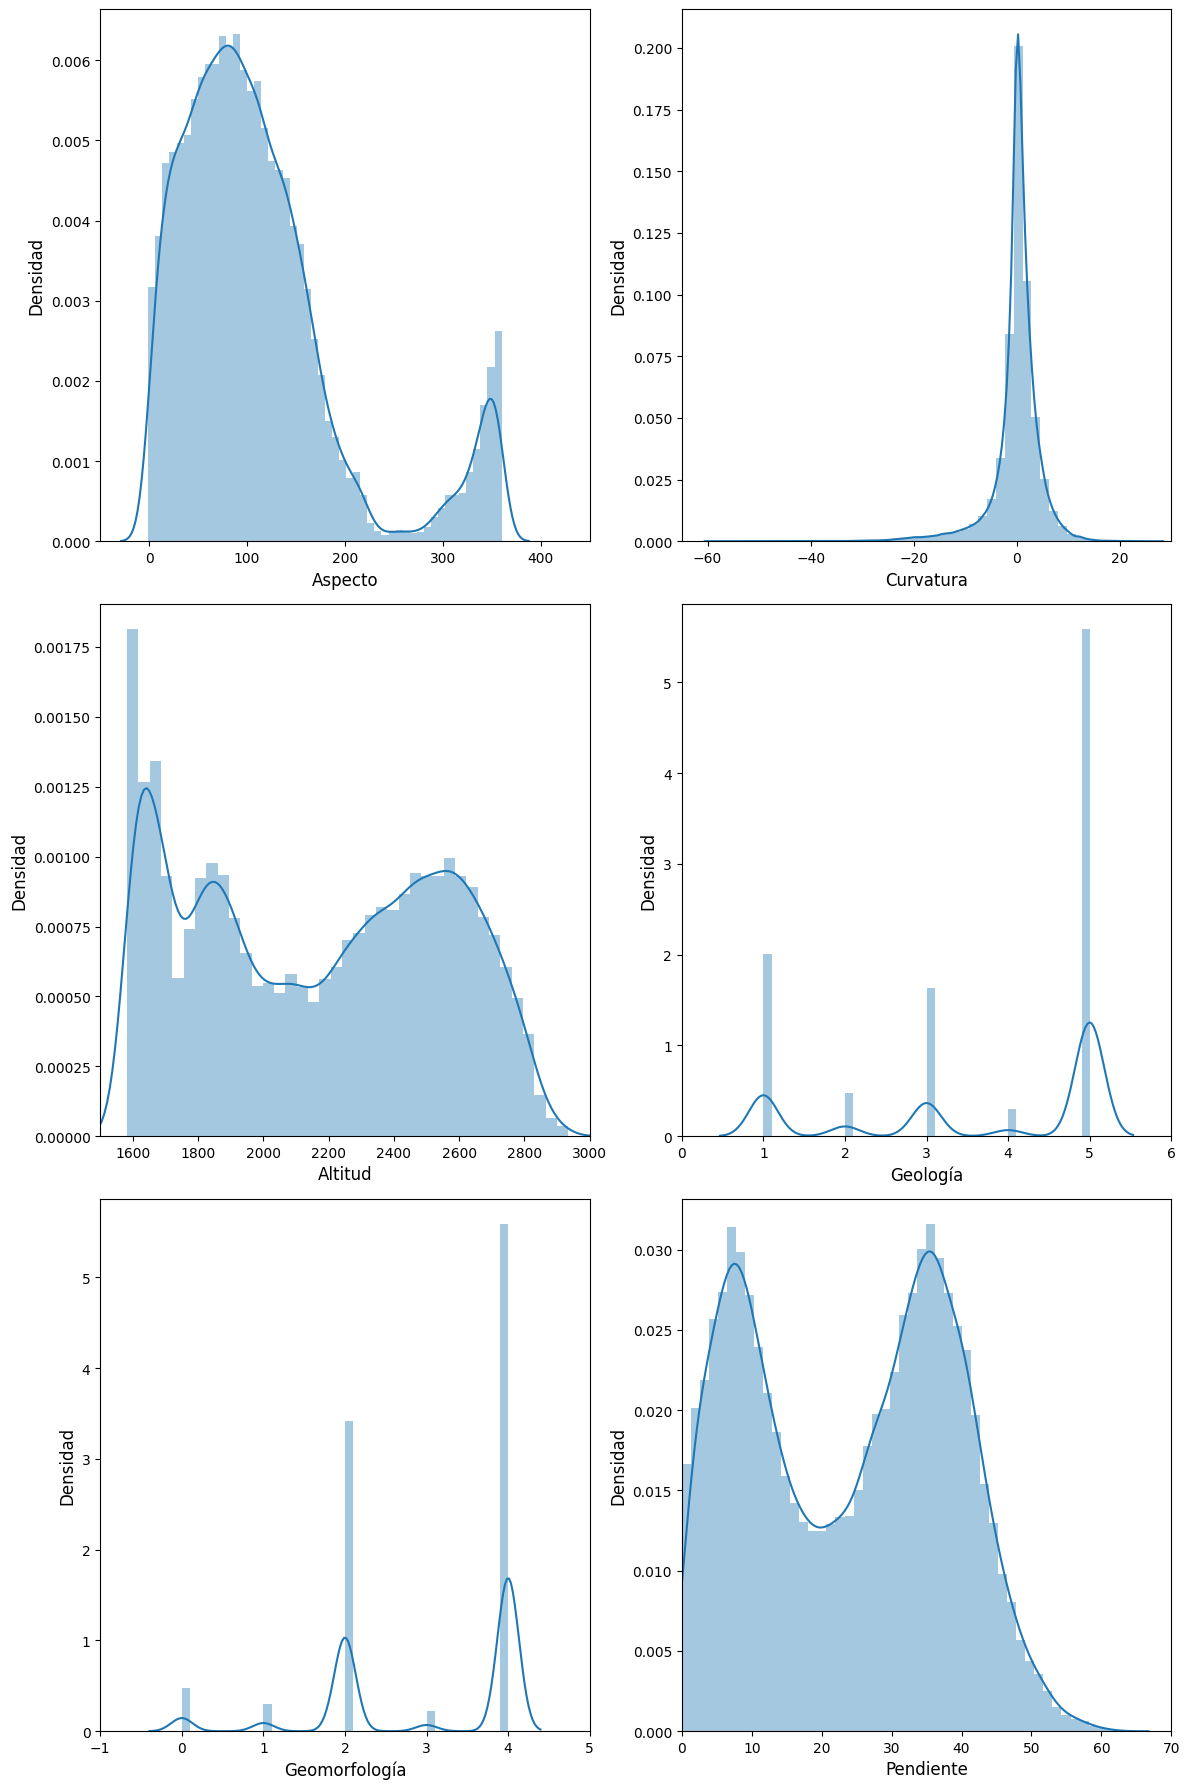

In [47]:
tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
nombres = ['Aspecto','Curvatura','Altitud','Geología','Geomorfología','Pendiente']
limites = [{-50:450}, {-65:30}, {1500:3000}, {0:6}, {-1:5}, {0:70}]

for i, variable in enumerate(tablaDatosVariables):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    sns.distplot(tablaDatosSinInv[f'{variable}'], ax=ax)
    ax.set_xlabel(nombres[i], color='k', size=12)
    ax.set_ylabel('Densidad', color='k', size=12)

    # Elimina las grillas
    ax.grid(False)
    
    limitesDic = limites[i]
    clave = list(limitesDic.keys())[0]
    valor = list(limitesDic.values())[0]
    ax.set_xlim(clave,valor)

plt.subplots_adjust(top=1, hspace=0.4, wspace=0.2)
plt.tight_layout()
#plt.savefig('GraficosDensidad.png', dpi=500, bbox_inches='tight')
plt.show()

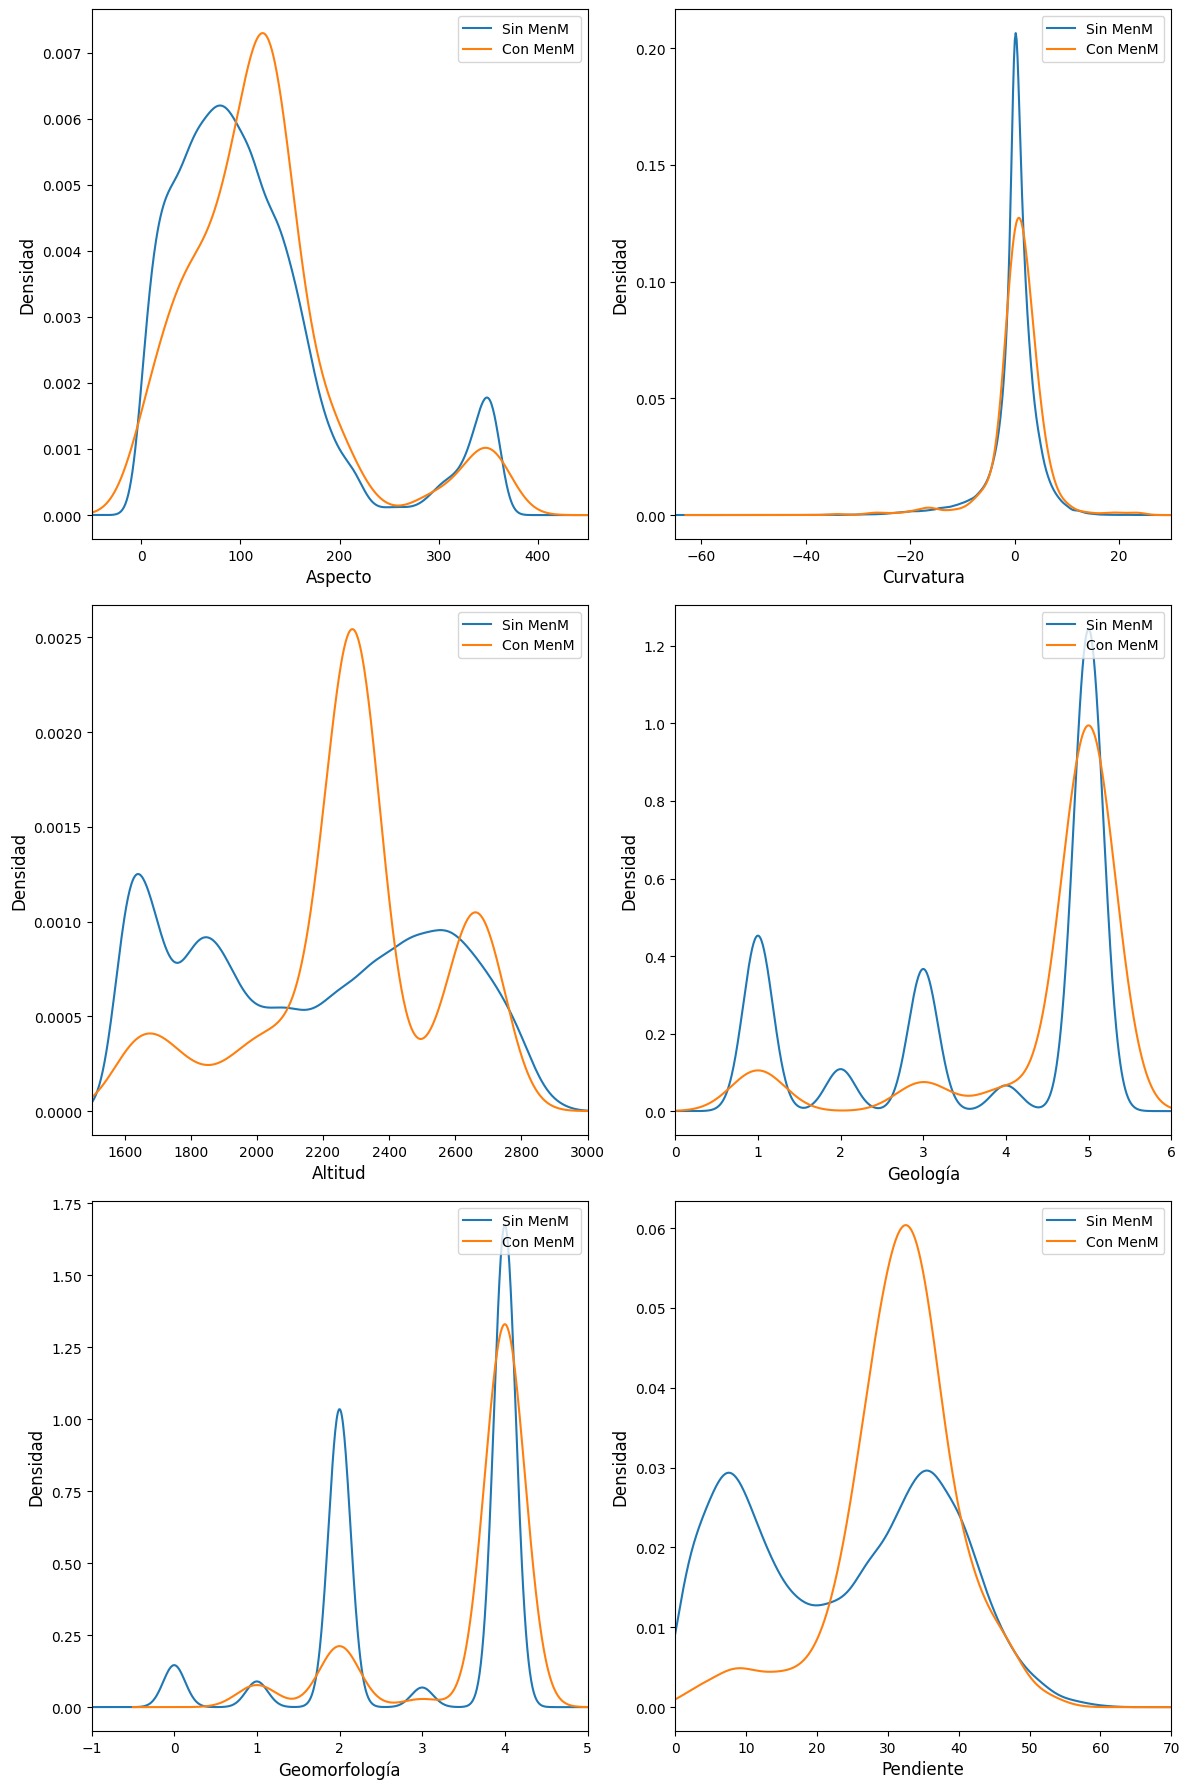

In [48]:
tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 18))

nombres = ['Aspecto','Curvatura','Altitud','Geología','Geomorfología','Pendiente']
limites = [{-50:450}, {-65:30}, {1500:3000}, {0:6}, {-1:5}, {0:70}]

for i,variable in enumerate(tablaDatosVariables):
    ax = axes[i // 2, i % 2]

    siMovEnMasa[f'{variable}'].plot.kde(ax=ax, label='Sin MenM')
    noMovEnMasa[f'{variable}'].plot.kde(ax=ax, label='Con MenM')

    limitesDic = limites[i]
    clave = list(limitesDic.keys())[0]
    valor = list(limitesDic.values())[0]
    
    ax.set_xlim(clave,valor)
    ax.set_xlabel(nombres[i], color='k', size=12)
    ax.set_ylabel('Densidad', color='k', size=12)
    ax.legend(loc=1, fontsize=10)
    ax.tick_params('y', colors='k', labelsize= 10)

plt.subplots_adjust(top=1, hspace=0.4, wspace=0.2)
plt.tight_layout()
#plt.savefig('GraficosDensidadMenM.png', dpi=500, bbox_inches='tight')
plt.show()

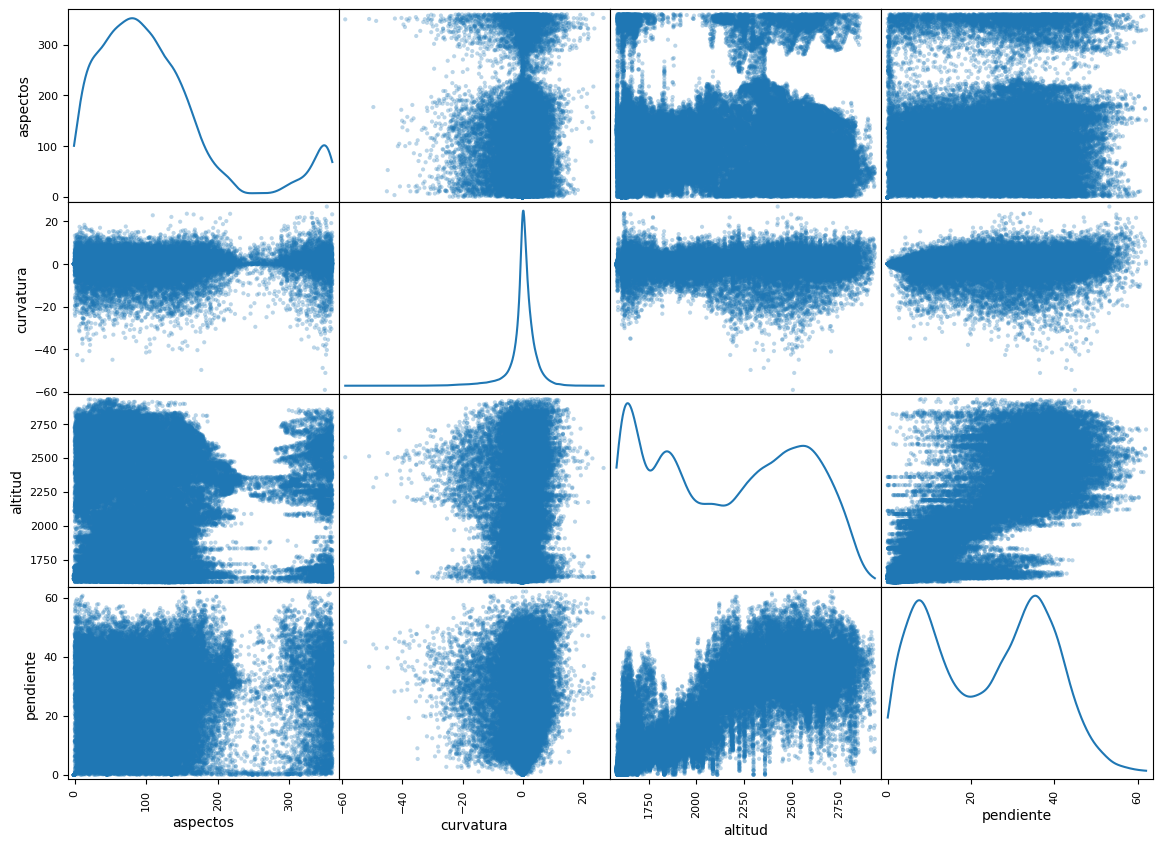

In [49]:
pd.plotting.scatter_matrix(tablaDatosContinuos, alpha = 0.3, figsize = (14,10), diagonal='kde');

In [50]:
tablaDatosAct = tablaDatos[(tablaDatos["inventario"] == 1) | (tablaDatos["inventario"] == 0).sample(frac = .01)]
#tablaDatosAct = tablaDatos[(tablaDatos["inventario"] == 1) | (tablaDatos["inventario"] == 0)]

tablaDatosContinuosInv = tablaDatosAct.drop(varCategoricas1 , axis = 1)
tablaDatosContinuosInv.info()

print('\n\n')

<class 'pandas.core.frame.DataFrame'>
Index: 1266 entries, 9 to 63250
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inventario  1266 non-null   float64
 1   aspectos    1266 non-null   float32
 2   curvatura   1266 non-null   float32
 3   altitud     1266 non-null   float32
 4   pendiente   1266 non-null   float32
dtypes: float32(4), float64(1)
memory usage: 39.6 KB





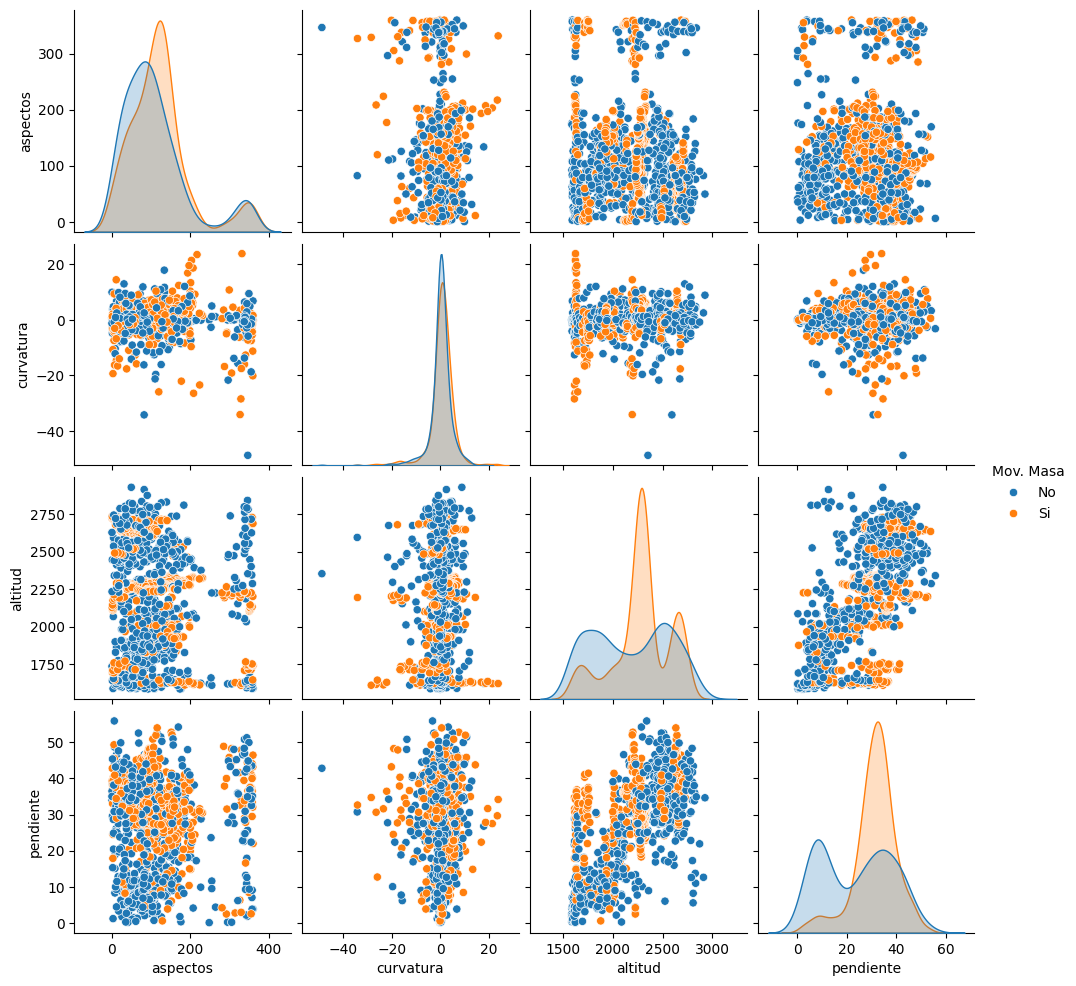

In [51]:
g = sns.pairplot(tablaDatosContinuosInv, hue='inventario')

# Personaliza la leyenda
g._legend.set_title('Mov. Masa')
g._legend.texts[0].set_text('No')
g._legend.texts[1].set_text('Si')

#plt.savefig('GraficosDatosContinuos.png', dpi=500, bbox_inches='tight')

In [53]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2978 sha256=2488f4d6ea2dd4628ee82191cce6dffaf4c552fbb850810d5ae811ef0e7db9d0
  Stored in directory: c:\users\personal-dr\appdata\local\pip\cache\wheels\9e\9e\4c\184e84f4ce918378a9ec9adafd1b6b73bea45f0a4a7855b6ce
Successfully built sklearn


In [65]:
!pip install PCA

  Obtaining dependency information for PCA from https://files.pythonhosted.org/packages/56/8b/79616adec3aee4b46cd736daac10a70c50b70c00eb687ba738ff79980d02/pca-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for datazets from https://files.pythonhosted.org/packages/f0/37/ff89984f6c59ddcbd987886dbcca61a34985a87475d4db82159974ce0440/datazets-0.1.9-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/1c/49/30ffcac5af06d08dfdd27da322ce31a373b733711bb272941877c1e4794a/scikit_learn-1.3.2-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for colourmap>=1.1.15 from https://files.pythonhosted.org/packages/05/37/10bb10d990a6c986d25c5c7407ad740ee0cf047a6a0a1f297b0b92e3caaf/colourmap-1.1.16-py3-none-any.whl.metadata
  Obtaining dependency information for scatterd>=1.3.7 from https://files.pythonhosted.org/packages/6a/a9/76be12419fe5475ac69fa9856e1a33df2a73c11bf2fa4a2365b0fa12f371/scatterd-1.3.

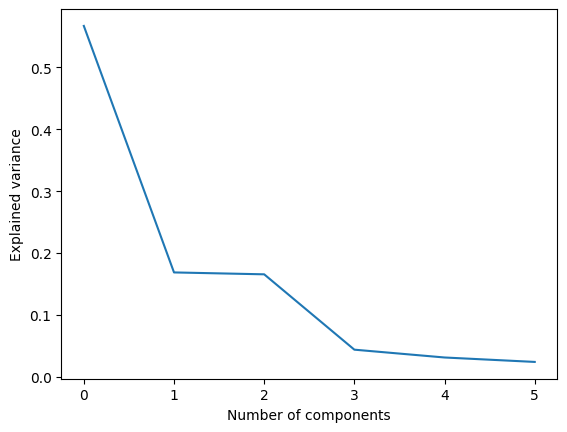

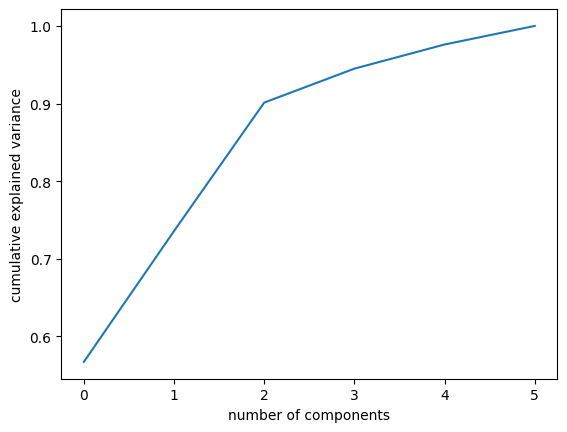

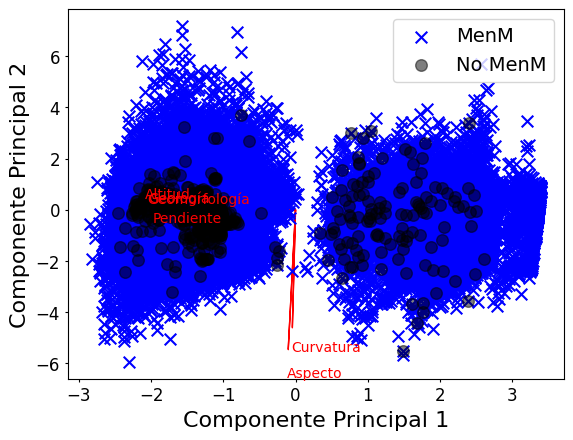

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)
columnas = ['Aspecto','Curvatura','Altitud','Geología','Geomorfología','Pendiente']
data = pd.DataFrame(scale(tablaDatosSinInv), columns = columnas)
puntos = tablaDatos['inventario']

## Se implementa el análisi PCA con la libreria sklearn de python
n = len(data.columns)
pca = PCA(n_components=n)
pca = pca.fit(data)
pca_samples = pca.transform(data)

#Se puede graficar cuanto aporta a la varianza cada componente generado
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

plt.savefig('PCA_Varianza.png', dpi=500, bbox_inches='tight')
plt.show()

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.savefig('PCA_AcumVarianza.png', dpi=500, bbox_inches='tight')
plt.show()

#Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de python
# 0,1 denota el componente princiapl 1 y 2 (PC1 and PC2); para otros componentes se modifica el número
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(data)[:,0] # Componente principal 1
ys = pca.transform(data)[:,1] # Componente principal 2

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys ) 

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(data.columns.values)[i], color='r') 

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)

plt.savefig('PCA_ProyeccionesC1C2.png', dpi=500, bbox_inches='tight')
plt.show()

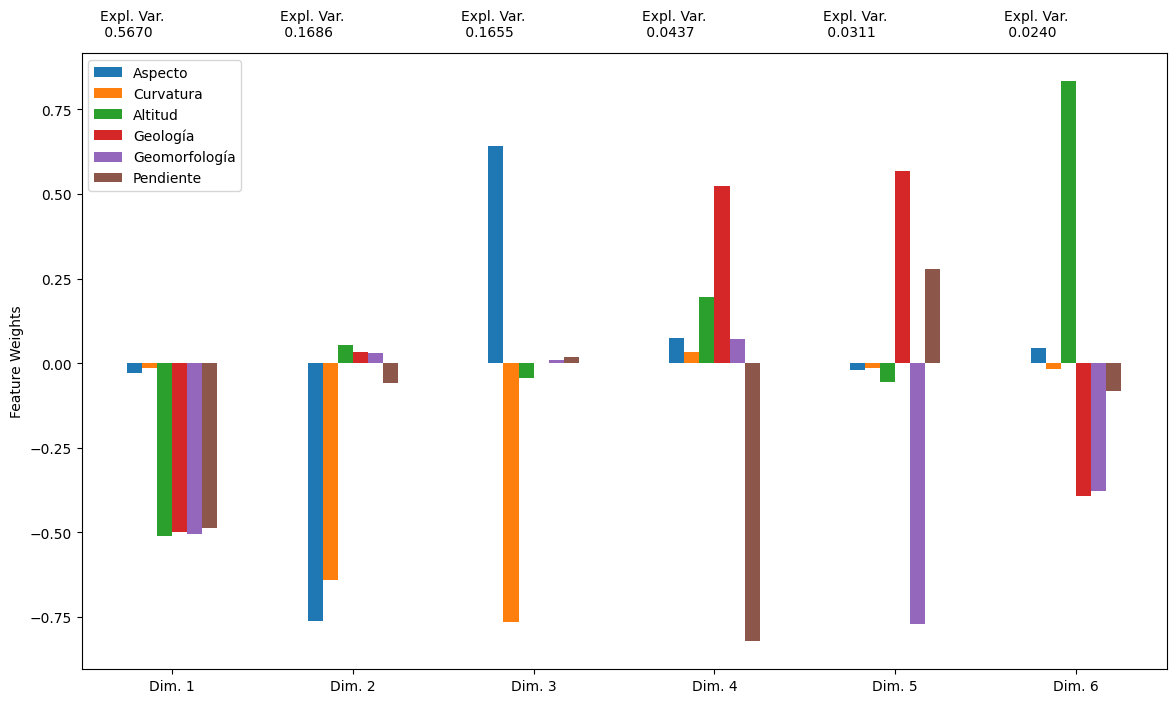

In [67]:
def pca_results(data, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)